<a href="https://colab.research.google.com/github/mini-u/BasicDL/blob/main/%5B2023_11_15_%EC%98%A4%ED%9B%84_2_26_57%5D_0_%EC%9C%A0%EC%84%B1%EB%AF%BC_%EC%8B%A4%EC%8A%B5%EB%A6%AC%ED%8F%AC%ED%8A%B89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습리포트9



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense


### MNIST with CNN

- 문제: 손글씨 데이터셋을 이용해 손글씨 데이터를 분류하는 CNN모델 만들기

- 실행결과: 지난 주에는 97.8% 의 정확도를 가졌는데, CNN모델을 사용하여 정확도가 98%로 성능이 향상된 것을 확인하였다.

In [ ]:
#데이터셋 로드

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000,)


In [ ]:
#정규화

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
#convolution layer에 적용하기 위해 이미지 데이터에 채널 추가

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
#모델 정의

model=Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
#모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

hist = model.fit(x_train, y_train,
               validation_data=(x_test, y_test),
               epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1487 - accuracy: 0.9560 - val_loss: 0.0602 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0496 - val_accuracy: 0.9825
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0453 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0516 - val_accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0429 -

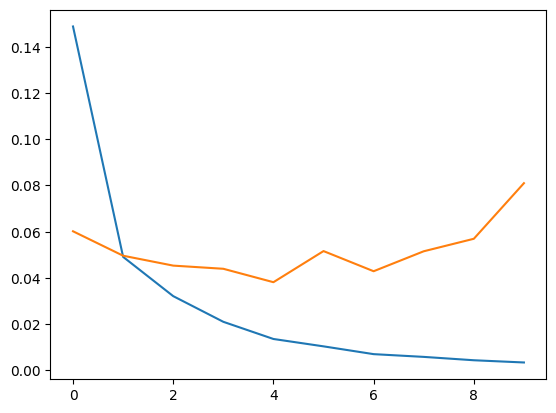

In [ ]:
#평가

loss= hist.history['loss']
val_loss=hist.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.show()

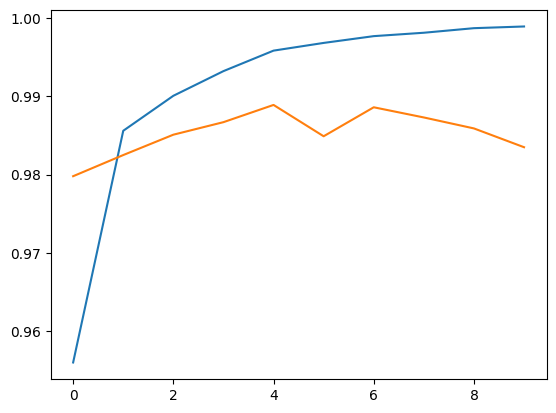

In [ ]:
#모델평가

acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0810 - accuracy: 0.9835


[0.0809841975569725, 0.9835000038146973]


### Fashion MNIST with CNN

- 문제: 패션 mnist 데이터셋을 이용해 패션 데이터를 분류하는 CNN모델 만들기, 위 모델과 다르게 컨볼루션, 풀링을 2번씩 진행한다.

- 실행결과: 지난 주에 했던 은닉층 1개인 모델로는 정확도 0.89로, 성능이 90%가 되지 않았다. 은닉층을 하나 추가해도 90%를 넘지 않았으며, 이 이상 은닉층을 추가하면 과대적합이 발생하는 상황이었는데, CNN모델을 사용하였더니 92% 정도의 정확도를 가지게 되었다.

In [ ]:
#데이터생성

fashion=keras.datasets.fashion_mnist
(f_x_train, f_y_train), (f_x_test, f_y_test) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#정규화

f_x_train, f_x_test = f_x_train/255.0, f_x_test/255.0

In [ ]:
#convolution layer에 적용하기 위해 이미지 데이터에 채널 추가

f_x_train = f_x_train.reshape(60000, 28, 28, 1)
f_x_test = f_x_test.reshape(10000, 28, 28, 1)

In [ ]:
#모델 정의

f_model=Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

f_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
#모델 컴파일

f_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

f_hist = f_model.fit(f_x_train, f_y_train,
               validation_data=(f_x_test, f_y_test),
               epochs=30, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2665 - accuracy: 0.9008 - val_loss: 0.2849 - val_accuracy: 0.8977
Epoch 2/30
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2287 - accuracy: 0.9152 - val_loss: 0.2779 - val_accuracy: 0.9008
Epoch 3/30
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2008 - accuracy: 0.9248 - val_loss: 0.2621 - val_accuracy: 0.9014
Epoch 4/30
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1763 - accuracy: 0.9340 - val_loss: 0.2579 - val_accuracy: 0.9086
Epoch 5/30
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1563 - accuracy: 0.9406 - val_loss: 0.2810 - val_accuracy: 0.9036
Epoch 6/30
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1388 - accuracy: 0.9471 - val_loss: 0.2661 - val_accuracy: 0.9110
Epoch 7/30
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1219 - accuracy: 0.9549 - val_loss: 0.2946 -

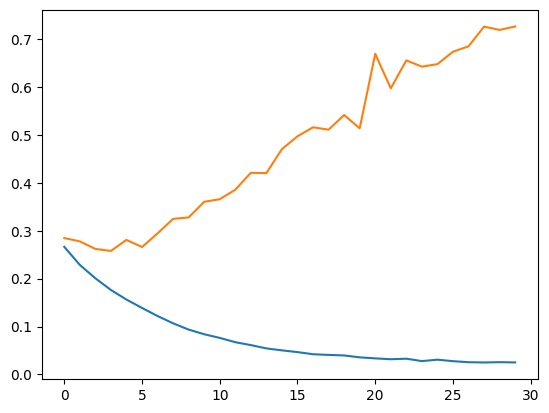

In [ ]:
#평가

f_loss= f_hist.history['loss']
f_val_loss=f_hist.history['val_loss']
plt.plot(f_loss)
plt.plot(f_val_loss)
plt.show()

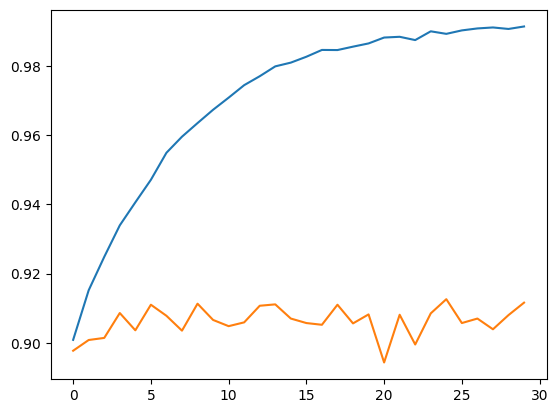

In [ ]:
#모델평가

f_acc=f_hist.history['accuracy']
f_val_acc=f_hist.history['val_accuracy']

plt.plot(f_acc)
plt.plot(f_val_acc)
plt.show()